In [36]:
# Import a few common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

First, we load and inspect the dataset. 

In [37]:
# Load dataset
housing = pd.read_csv("./data/housing.csv")
housing.head()  # Return the first five rows of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note that the attribute total_bedrooms has 207 missing values. The attribute ocean_proximity is also a categorical attribute.

In [39]:
# Count the values of categorical attribute
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [40]:
# Summary of the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


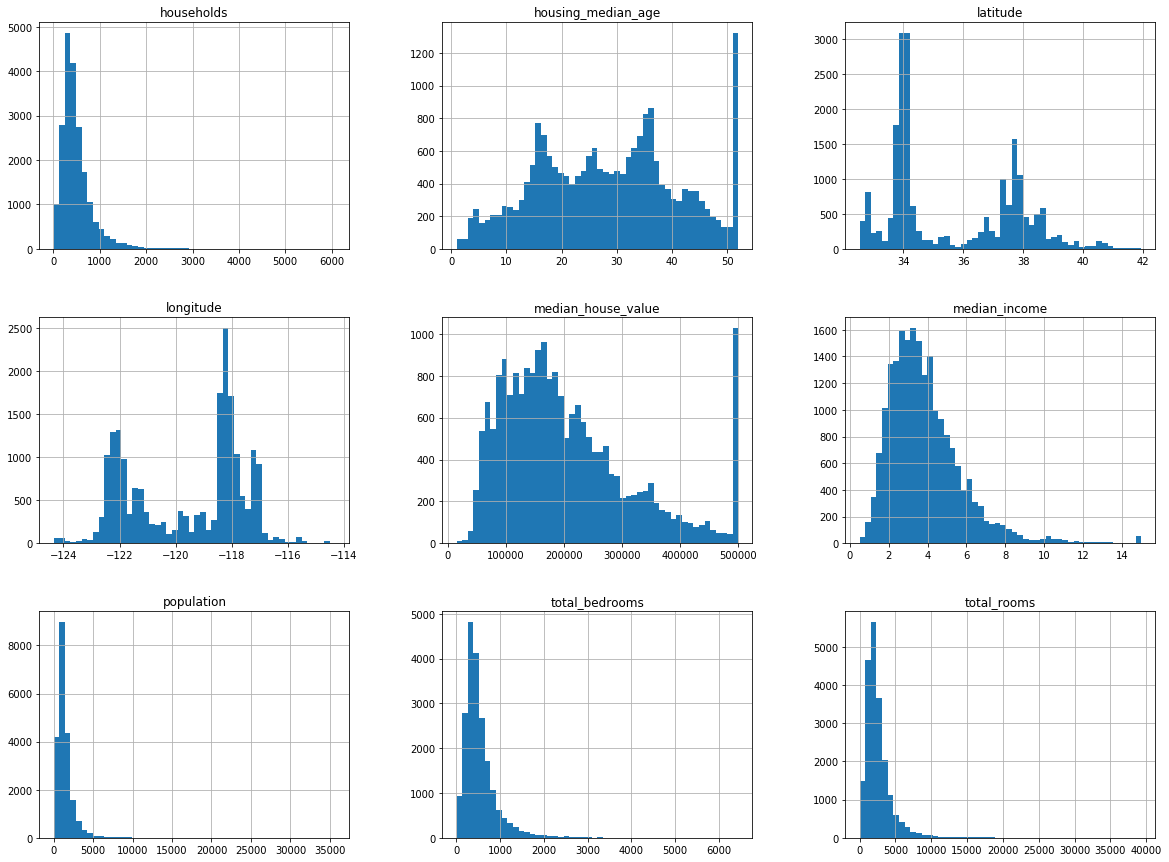

In [41]:
# Plot histogram of data
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

We can see that the median house value, our attribute which we want to predict, is capped at 500000$. The attributes also have different scales. The histogram also shows that they are tail heavy.

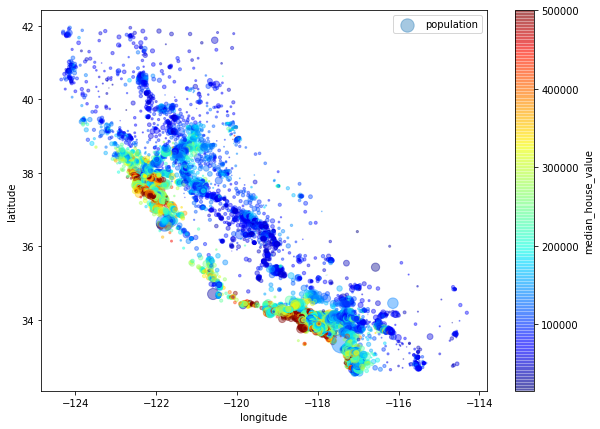

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

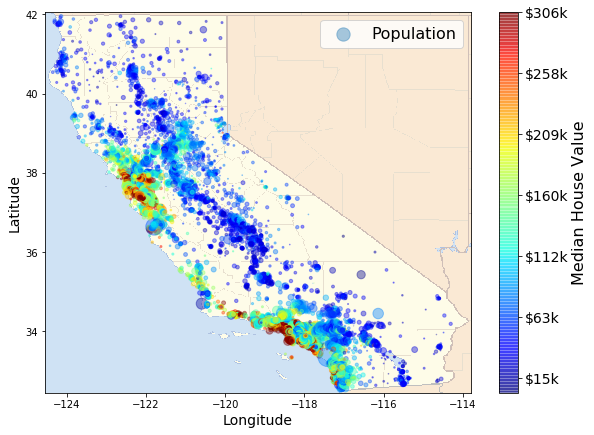

In [43]:
import matplotlib.image as mpimg
california_img=mpimg.imread("./images/california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

Since the dataset is not too large, we can easily compute the correlations. Let's look at how much each attribute correlates with the median house value.

In [44]:
# Looking for correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The most promising attribute is the median income. So let's plot the correlation scatterplot.

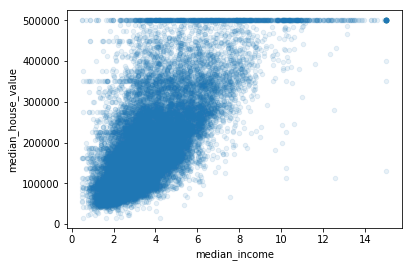

In [45]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

We split the dataset into a training set and a test set. 

In [46]:
# Split data into train and test data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"].copy()

In [47]:
# Seperate numerical and categorical attributes
X_train_num = X_train.drop("ocean_proximity", axis=1)
X_train_cat = X_train["ocean_proximity"]

We build a pipeline which does the preprocessing and transformation of the data. The numerical attributes will be standardized with StandardScaler(). The missing values are also imputed with the median of the corresponding attribute. The categorical attribute will be encoded.

In [48]:
# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X_train_tr = full_pipeline.fit_transform(X_train)

Select and Train Model

We select the Stochastic Gradient Descent, Support Vector Machine, Decision Tree and Random Forest to train different models. With grid search we can try different parameters and evaluate the models with cross validation. The best model of each algorithm is selected as the final model.

The main parameters to adjust when using Random Forest is n_estimators and max_features. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias.

In [58]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [2, 6, 10, 30], 'max_features': [2, 4, 6, 8]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5)
grid_search.fit(X_train_tr, y_train)
print("Best parameters: ", grid_search.best_params_)
forest_model = grid_search.best_estimator_

Best parameters:  {'max_features': 6, 'n_estimators': 30}


For SVM, we select the RBF kernel. The parameters C and gamma are varied, because these are the most important.

In [64]:
# Support Vector Machine
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['rbf'], 'C': [1, 3, 10, 1000], 'gamma': [0.01, 0.1, 1.0]},
]
svr_reg = SVR()
grid_search = GridSearchCV(svr_reg, param_grid, cv=5)
grid_search.fit(X_train_tr, y_train)
print("Best parameters: ", grid_search.best_params_)
svr_model = grid_search.best_estimator_

Best parameters:  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [60]:
from sklearn.tree import DecisionTreeRegressor

param_grid = [
    {'max_depth': [1, 3, 10, 100]}
]
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5)
grid_search.fit(X_train_tr, y_train)
print("Best parameters: ", grid_search.best_params_)
tree_model = grid_search.best_estimator_

Best parameters:  {'max_depth': 10}


In [70]:
from sklearn.linear_model import SGDRegressor

param_grid = [
    {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1, 10, 100, 1000],} # number of epochs
]
sgd_reg = SGDRegressor()
grid_search = GridSearchCV(sgd_reg, param_grid, cv=5)
grid_search.fit(X_train_tr, y_train)
print("Best parameters: ", grid_search.best_params_)
sgd_model = grid_search.best_estimator_

Best parameters:  {'alpha': 0.0001, 'max_iter': 1000}


Evaluation on test set

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()
X_test_tr = full_pipeline.transform(X_test)

models = {'SGD': sgd_model, 'SVM': svr_model, 'Decision Tree': tree_model, 'Random Forest': forest_model}

for name, model in models.items():
    model.fit(X_train_tr, y_train)
    predictions = model.predict(X_test_tr)
    print(name)
    print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, predictions)))  # Root Mean Squared Error
    print('R2: %.2f' % r2_score(y_test, predictions))  # R2-Score
    print('\n')

SGD
RMSE: 70132.35
R2: 0.62


SVM
RMSE: 70035.96
R2: 0.63


Decision Tree
RMSE: 61771.75
R2: 0.71


Random Forest
RMSE: 50248.82
R2: 0.81


